In [140]:
# Practice web scraping using BS4
# Website: Craigslist - Because I want to get a new PC :)

import requests
import re
from bs4 import BeautifulSoup

In [141]:
# get the data
url = "https://newyork.craigslist.org/d/computers/search/sya"
data = requests.get(url)

# load data into bs4
soup = BeautifulSoup(data.text, "html.parser")

In [142]:
# Look for the result-info <p> tags
result_info = soup.find_all('p', {'class':'result-info'})

# Each result-info tag has one listing
for result in result_info:
    # Title of the post item
    title = result.find('a', {'class':"result-title hdrlnk"}).text
    
    # Price of the post item
    price = result.find('span', {'class':'result-price'}).text
    
    # Use regular expression to get the Year of machine
    import re
    
    # Find the year (20XX)
    year_re = re.compile(r'.*(20\d{2}).*')
    match = year_re.match(title)

    if match:
        year = match.group(1)
    
    # Only want MAC Machines
    if 'mac' in title.lower():
        print('|'.join([price.ljust(10), year.ljust(10), title]))

$250      |2011      |iMac 21.5" 2011 OS X El Capitan Excellent Condition
$250      |2012      |✅ 16Gb Mac Mini 2.5Ghz i5 Late 2012, 500GB HD MacOS 10.15 Catalina
$600      |2010      |Mac Pro 2010 3.33 GHz 6-Core 16GB RAM + 2TB Hard Drive + USB-C Card
$80       |2010      |Apple Macintosh Plus 1 Mb
$425      |2010      |Mac Pro 2010 Tower 16 GBs RAM Quad Core Fast 3.46 Ghz Intel 5,1 Dual
$1450     |2016      |MacBook Pro 15-inch 2016
$580      |2015      |Like New MacBook Air 13 inch 8GB 2015 Intel Core i5
$500      |2015      |Canon copy machine
$500      |2013      |iMac 21.5" Late 2013 16GB Ram, 1TB HD, 2.9GHz Intel Core i5
$40       |2020      |Macbook pro
$1700     |2019      |MacBook Pro 15” Touch Bar 2.2GHz 16GB RAM 256GB SSD Purchased in 2019
$550      |2013      |Top Spec - 21.5" iMac, Late 2013 with Wireless Keyboard and Mouse
$1600     |2017      |2017 MACBOOK PRO 15" TOUCHBAR - 3.1 CORE i7 16GB 1TB SSD RADEON 560
$900      |2018      |Apple MacBook Core 1.2GHz 8GB 12" 256G

In [143]:
# list to store all the result
search_result = []

def Read_Craigslist(page_url):
    '''
        Helper function
        Put it in a function and loop for a couple of results
        Take a string page_url and check for new mac listings
    '''
    data = requests.get(page_url)

    # load data into bs4
    soup = BeautifulSoup(data.text, "html.parser")
    
    # look for the result-info <p> tags
    result_info = soup.find_all('p', {'class':'result-info'})

    # each result-info tag has one listing
    for result in result_info:
        # title of the post item
        title = result.find('a', {'class':"result-title hdrlnk"}).text
        
        # price of the post item
        price = result.find('span', {'class':'result-price'}).text
        price = int(price.replace('$', ''))

        # find the year (20XX)
        year_re = re.compile(r'.*(20\d{2}).*')
        match = year_re.match(title)

        # only want MAC Machines
        # from experience, usually if it is cheaper than $100
        # It is usually parts, box, or questionable listing.
        title_str = title.lower()
        if 'mac' in title_str and price > 100:
            
            link_str = "NA"
            
            # This is greatly shorten, need more review to document
            # result.find_all() return a list
            # we know by analysis that the link is in the first element
            # and need to retrieve the link using the 'href' index
            link = result.find_all('a', href=True)[0]['href']
            if "https://" in link:
                # assign to link_str
                link_str = link

            if match:
                # Extract the year from title
                year = match.group(1)
            else:
                # for the listing we can't find in the title
                # we will need to visit the page
                listing_body_data = requests.get(link_str)
                soup2 = BeautifulSoup(listing_body_data.text, "html.parser")
                
                
                
            # determine if what type of machine it is
            if 'imac' in title_str or 'desktop' in title_str:
                cat = 'desktop'
            elif 'macbook' in title_str or 'laptop' in title_str:
                cat = 'laptop'
            elif 'mac pro' in title_str:
                cat = 'desktop'
            else:
                cat = "NA"
            
            # display result with piple delimiter
            new_item = [cat, price, year, title]
            
            # print the information to the terminal as feedback
            # for information in new_item:
                # limit to only 50 characters max
                # print(str(information).ljust(10)[:50], end='')
            # print a new line to space out
            
            search_result.append(new_item)
            
# get the data
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=120")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=240")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=360")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=480")

In [144]:
import pandas as pd

header = ['cat', 'price', 'year', 'listing_title']
apple_df = pd.DataFrame(search_result,
                        columns = header)

In [145]:
apple_df.drop_duplicates(keep=False, inplace=True)
apple_df = apple_df[apple_df.cat != "NA"]

apple_df

,cat,price,year,listing_title
1,desktop,600,2010,Mac Pro 2010 3.33 GHz 6-Core 16GB RAM + 2TB Ha...
2,desktop,425,2010,Mac Pro 2010 Tower 16 GBs RAM Quad Core Fast 3...
3,desktop,2300,NA,BRAND NEW Mac Pro 3.5Ghz 6C 16GB RAM 512GB Dua...
5,desktop,225,NA,"8Core Macpro 2.8Ghz, 500HD, 8GB Ram MacOS 10.1..."
6,laptop,460,NA,"MacBook Pro 15"""
8,laptop,600,2010,MacBook pro 15.4 2010
9,laptop,225,NA,Apple Mac Macbook A1181 white laptop Core 2 du...
10,laptop,625,NA,"Apple Mac Macbook Pro 15"" laptop i5 8 gb ram"
11,laptop,300,NA,Apple Mac Macbook Pro A1278 laptop Core 2 duo ...
13,desktop,300,NA,Tenba flight softcase for Mac Pro and other to...


In [146]:
# how many laptop and desktop are there respectively?
# please create a stacked bar graph with year and machine types

# find out how many unique years are there
# return an arrays
years = apple_df.year.unique()

years

array(['2010', 'NA', '2009', '2013', '2007', '2008', '2016', '2019',
       '2015', '2014', '2018', '2011', '2017'], dtype=object)

In [147]:
# then generate a grouped dataframe with the counts of each 
# deskptop and laptop per year
counts = apple_df.groupby(['year', 'cat']).count()['listing_title']
print(counts)

year  cat    
2007  desktop     1
2008  desktop     3
2009  desktop     3
2010  desktop     7
      laptop      2
2011  desktop     2
      laptop      2
2013  desktop     7
      laptop      5
2014  laptop      5
2015  desktop     1
      laptop      6
2016  laptop      3
2017  laptop      3
2018  laptop      1
2019  laptop      3
NA    desktop    17
      laptop     32
Name: listing_title, dtype: int64


In [148]:
# using that, I can easily calculate the total number of listing per year (group)
totals = counts.sum(level=0)
print(totals)

year
2007     1
2008     3
2009     3
2010     9
2011     4
2013    12
2014     5
2015     7
2016     3
2017     3
2018     1
2019     3
NA      49
Name: listing_title, dtype: int64


In [149]:
# to prepare for plotting, transform counts dataframe to separate 
# each cat (laptop/desktop) instead of by index.
# also dropping the "listing_title" because unstack() operation
# creates a multindex and it's easier to work with df without 
# the multiindex.
counts = counts.unstack(level=1)
print(counts)

cat   desktop  laptop
year                 
2007      1.0     NaN
2008      3.0     NaN
2009      3.0     NaN
2010      7.0     2.0
2011      2.0     2.0
2013      7.0     5.0
2014      NaN     5.0
2015      1.0     6.0
2016      NaN     3.0
2017      NaN     3.0
2018      NaN     1.0
2019      NaN     3.0
NA       17.0    32.0


In [150]:
# now just need to replace the NaN by 0
counts = counts.fillna(0)

print(type(counts))
print(counts)

<class 'pandas.core.frame.DataFrame'>
cat   desktop  laptop
year                 
2007      1.0     0.0
2008      3.0     0.0
2009      3.0     0.0
2010      7.0     2.0
2011      2.0     2.0
2013      7.0     5.0
2014      0.0     5.0
2015      1.0     6.0
2016      0.0     3.0
2017      0.0     3.0
2018      0.0     1.0
2019      0.0     3.0
NA       17.0    32.0


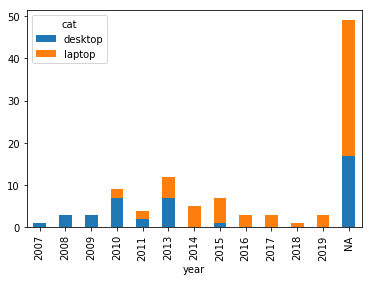

In [151]:
counts.plot.bar(stacked=True)

In [123]:
# Analysis: There are mostly 2010-2013 desktop,
# with a lot of laptops from 2013-2019.

In [73]:
# Let's put everything in a function and look at Dell.

# list to store all the result
new_search_result = []

def Read_Craigslist(page_url, brand):
    '''
        Helper function
        Put it in a function and loop for a couple of results
        Take a string page_url and check for new mac listings
    '''
    data = requests.get(page_url)

    # load data into bs4
    soup = BeautifulSoup(data.text, "html.parser")
    
    # look for the result-info <p> tags
    result_info = soup.find_all('p', {'class':'result-info'})

    # each result-info tag has one listing
    for result in result_info:
        # title of the post item
        title = result.find('a', {'class':"result-title hdrlnk"}).text

        # price of the post item
        price = result.find('span', {'class':'result-price'}).text
        price = int(price.replace('$', ''))

        # use regular expression to get the Year of machine
        import re

        # find the year (20XX)
        year_re = re.compile(r'.*(20\d{2}).*')
        match = year_re.match(title)

        # only want MAC Machines
        # from experience, usually if it is cheaper than $100
        # It is usually parts, box, or questionable listing.
        title_str = title.lower()
        
        # also remove the symbols from string
        # https://stackoverflow.com/questions/875968/how-to-remove-symbols-from-a-string-with-python
        # re.sub: replacing anything that is not a word (number/letter)
        # title_str = re.sub(r'[^\w]', ' ', title_str)
        
        # but I realized usually only * are problem
        title_str = title_str.replace("*", "")
        
        if brand in title_str and price > 100:
            if match:
                # Extract the year from title
                year = match.group(1)
            else:
                year = "NA"
                
            # determine if what type of machine it is
            if 'desktop' in title_str:
                cat = 'desktop'
            elif 'laptop' in title_str or 'notebook' in title_str:
                cat = 'laptop'
            else:
                cat = "unknown"
            
            # display result with piple delimiter
            new_item = [cat, price, year, title_str.strip()]
            
            # print the information to the terminal as feedback
            for information in new_item:
                # limit to only 50 characters max
                print(str(information).ljust(10)[:50], end='')
            # print a new line to space out
            print()
            
            search_result.append(new_item)
            
# get the data
Read_Craigslist("https://newyork.craigslist.org/d/computers/search/sya", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?s=120", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?s=240", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?s=360", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?s=480", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?s=600", "dell")

laptop    299       NA        wholesale lot of 5 pieces dell latitude d630 core 
laptop    850       NA        dell g3 gaming laptop 9th gen i7/15.6/4gignvidia16
desktop   500       NA        dell inspiron 3670 desktop 9th gen i5 6 core 4.1gh
laptop    125       NA        dell vostro notebook fully restored
laptop    325       NA        dell inspiron 15 laptop quad pentium 15.6/8gig1/tb
desktop   295       NA        2 dell optiplex 7010 / 9020 desktop computer
laptop    125       NA        dell vostro notebook fully restored
unknown   900       NA        dell i7559 microsoft signature edition - 4k touchs
unknown   450       NA        dell t5810 - workstation
laptop    125       NA        dell vostro notebook fully restored
unknown   190       NA        dell venue 11 pro tablet 8gb ram
unknown   185       NA        dell latitude e6520 15.6" core i5-2520m @ 2.50ghz 
unknown   400       NA        dell optip 3050 mff i5-7500 win10 pro warranty nib
desktop   320       NA        dell i7 desk